In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

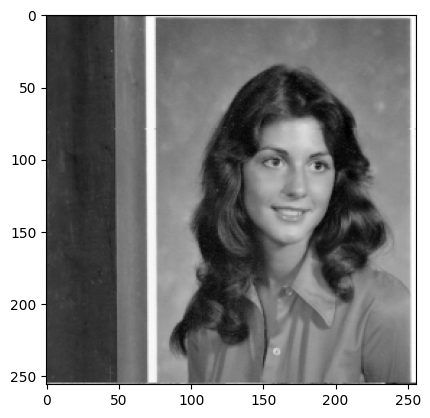

In [2]:
# 画像ファイルの読み込み
image = cv2.imread('grayscale/Girl2.bmp')

# OpenCVでは画像がBGRで読み込まれるため、グレースケールに変換（表示のため）
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 画像の表示
plt.imshow(image_gray, cmap="gray")

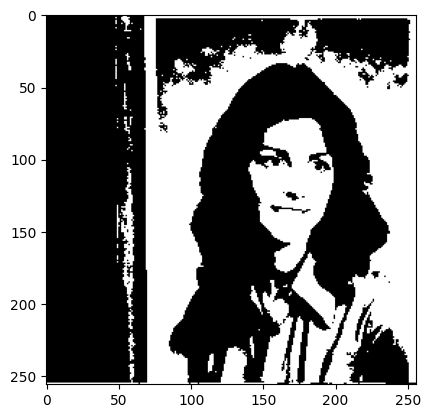

In [3]:
# 高さと幅の取得
height, width = image_gray.shape

# 閾値の設定
threshold = 127

# 生成する画像の初期化
image_binary = np.zeros(image_gray.shape)

for y in range(height):
    for x in range(width):
        if image_gray[y, x] > threshold:
            image_binary[y][x] = 255 # 閾値より大きいとき255
        else:
            image_binary[y][x] = 0 # 閾値以下のとき0

# 画像の表示
plt.imshow(image_binary, cmap="gray")

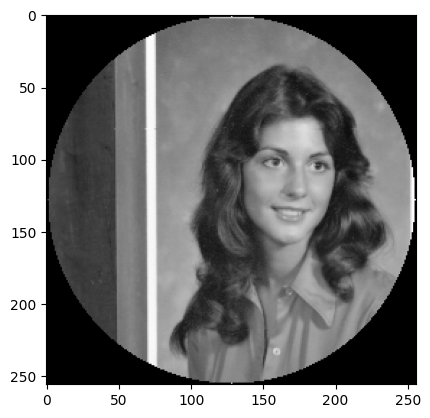

In [4]:
# マスク画像の読み込み
mask = cv2.imread("mask.bmp")

# OpenCVでは画像がBGRで読み込まれるため、グレースケールに変換（表示のため）
mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# 高さと幅の取得
height, width = image_gray.shape

# 生成する画像の初期化
image_mask = np.zeros(image_gray.shape)

for y in range(height):
    for x in range(width):
        if mask_gray[y, x] == 255:
            image_mask[y][x] = image_gray[y][x] # マスク画像が白のとき画像のまま
        else:
            image_mask[y][x] = 0 # マスク画像が黒のとき0

# 画像の表示
plt.imshow(image_mask, cmap="gray")

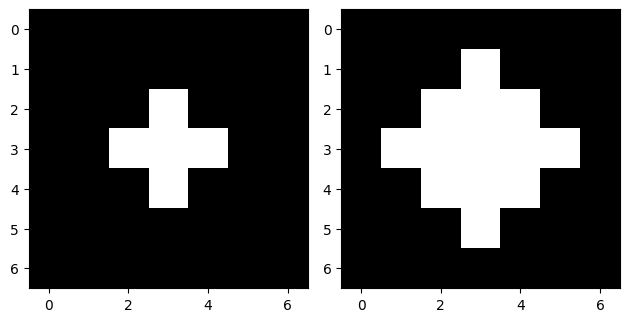

In [5]:
# カーネル
kernel = np.array([[0, 1, 0], 
                   [1, 1, 1], 
                   [0, 1, 0]], dtype=np.uint8)

image = np.array([[0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 255, 0, 0, 0],
                  [0, 0, 255, 255, 255, 0, 0],
                  [0, 0, 0, 255, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)

image_dilation = cv2.dilate(image, kernel, iterations=1)

# 結果を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image, cmap="gray")
axes[1].imshow(image_dilation, cmap="gray")

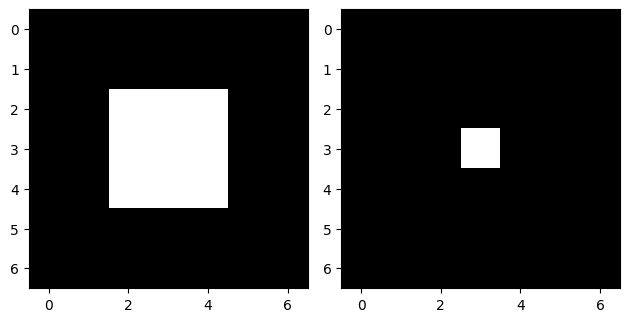

In [6]:
# カーネル
kernel = np.array([[0, 1, 0], 
                   [1, 1, 1], 
                   [0, 1, 0]], dtype=np.uint8)

image = np.array([[0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 255, 255, 255, 0, 0],
                  [0, 0, 255, 255, 255, 0, 0],
                  [0, 0, 255, 255, 255, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)

image_erosion = cv2.erode(image, kernel, iterations=1)

# 結果を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image, cmap="gray")
axes[1].imshow(image_erosion, cmap="gray")

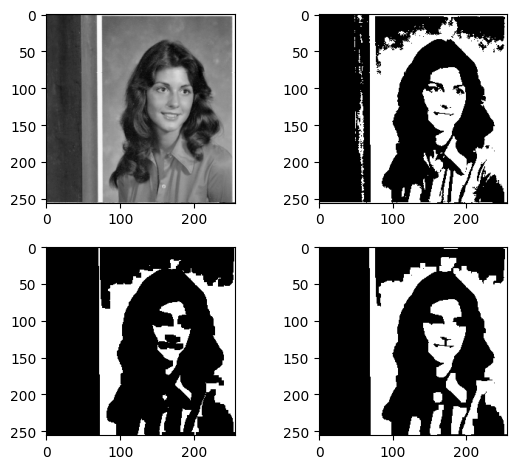

In [7]:
# カーネル
kernel = np.array([[1, 1, 1], 
                   [1, 1, 1], 
                   [1, 1, 1]], dtype=np.uint8)

image_erosion = cv2.erode(image_binary, kernel, iterations=3)
image_dilation = cv2.dilate(image_erosion, kernel, iterations=3)

# 結果を表示
fig, axes = plt.subplots(2, 2, tight_layout=True)
axes[0, 0].imshow(image_gray, cmap="gray")
axes[0, 1].imshow(image_binary, cmap="gray")
axes[1, 0].imshow(image_erosion, cmap="gray")
axes[1, 1].imshow(image_dilation, cmap="gray")

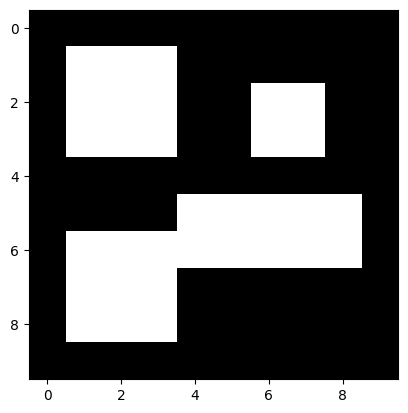

In [17]:
image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 255, 255, 255, 0, 0, 0, 0, 0, 0],
                  [0, 255, 255, 255, 0, 0, 255, 255, 0, 0],
                  [0, 255, 255, 255, 0, 0, 255, 255, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 255, 255, 255, 255, 255, 0],
                  [0, 255, 255, 255, 255, 255, 255, 255, 255, 0],
                  [0, 255, 255, 255, 0, 0, 0, 0, 0, 0],
                  [0, 255, 255, 255, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)


"""
image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 255, 255, 255, 0, 0, 0, 0, 0, 0],
                  [0, 255, 255, 255, 0, 0, 255, 255, 0, 0],
                  [0, 255, 255, 255, 0, 0, 255, 255, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 255, 255, 255, 255, 255, 0],
                  [0, 255, 255, 255, 255, 255, 255, 255, 255, 0],
                  [0, 255, 0, 0, 255, 0, 0, 255, 0, 0],
                  [0, 255, 255, 0, 255, 0, 255, 255, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
"""


plt.imshow(image, cmap="gray")
plt.savefig("fig1.png")

In [18]:
def labeling(image):
    
    height, width = image.shape # 画像のサイズを取得
    label_image = np.zeros_like(image)  # ラベリング結果を格納する配列
    current_label = 1  # ラベルの初期値

    # 4近傍を定義（上, 左, 下, 右）
    #neighbors = [(-1, 0), (0, -1), (1, 0), (0, 1)]

    # 8近傍
    neighbors = [(-1, 0), (0, -1), (1, 0), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    # ラベリング処理
    for i in range(1, height-1):
        for j in range(1, width-1):
            if image[i, j] == 255:  # 注目画素が255のとき（白領域）
                
                # 4近傍のラベルを確認
                neighbor_labels = []
                for di, dj in neighbors:
                    ni = i + di
                    nj = j + dj
                    if label_image[ni, nj] > 0:
                        neighbor_labels.append(label_image[ni, nj])

                if len(neighbor_labels) == 0:  # 4近傍内にラベルがない場合
                    label_image[i, j] = current_label  # 新しいラベルを付ける
                    current_label += 1
                else:  # 4近傍内にラベルがある場合
                    label_image[i, j] = min(neighbor_labels)  # 最小のラベルを付ける

    return label_image

In [19]:
# ラベルの接続関係
def find_connection(label_image):
    connection = {}
    height, width = label_image.shape # 画像のサイズを取得
    
    # 4近傍を定義（上, 左, 下, 右）
    neighbors = [(-1, 0), (0, -1), (1, 0), (0, 1)]

    # 8近傍
    #neighbors = [(-1, 0), (0, -1), (1, 0), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    
    for i in range(1, height-1):
        for j in range(1, width-1):
            current_label = label_image[i, j]
    
            for di, dj in neighbors:
                ni = i + di
                nj = j + dj
                neighbor_label = label_image[ni, nj]

                if current_label != 0 and neighbor_label != 0:
                    if current_label < neighbor_label:
                        connection[(current_label.item(), neighbor_label.item())] = 1
                    elif neighbor_label < current_label:
                        connection[(neighbor_label.item(), current_label.item())] = 1

    return list(connection.keys())

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 0 0 2 2 0 0]
 [0 1 1 1 0 0 2 2 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 3 3 3 3 0]
 [0 4 4 3 3 3 3 3 3 0]
 [0 4 3 3 0 0 0 0 0 0]
 [0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


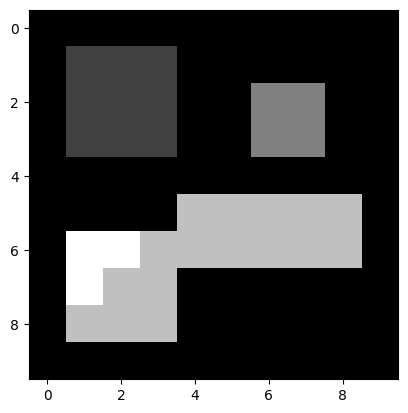

In [20]:
# ラベリング処理
label_image = labeling(image)
plt.imshow(label_image, cmap="gray")
print(label_image)

[(3, 4)]
[[0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 0 0 2 2 0 0]
 [0 1 1 1 0 0 2 2 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 3 3 3 3 0]
 [0 3 3 3 3 3 3 3 3 0]
 [0 3 3 3 0 0 0 0 0 0]
 [0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


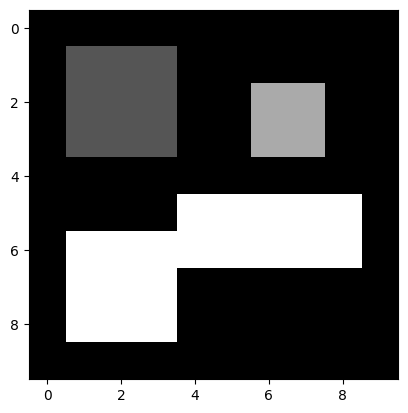

In [21]:
# ラベルの接続関係
connection_list = find_connection(label_image)
print(connection_list) # [(3, 4)]

# 接続関係に基づき統合
for connection in connection_list:
    label1, label2 = connection
    label_image[label_image==label2] = label1

# 結果の確認
plt.imshow(label_image, cmap="gray")
print(label_image)

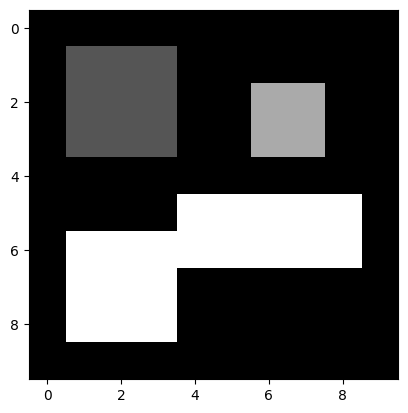

In [22]:
# ラベリング処理と統計情報の取得
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image)
plt.imshow(labels, cmap="gray")

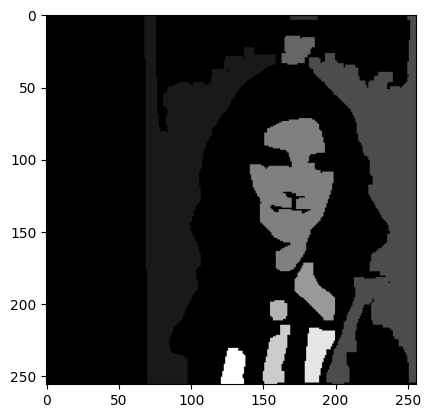

In [23]:
# ラベリング処理と統計情報の取得
image_dilation = image_dilation.astype(np.uint8) 
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image_dilation)
plt.imshow(labels, cmap="gray")

3
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 2 2 2 0]
 [0 0 0 0 0 0 0 2 2 2 2 0]
 [0 0 0 0 0 0 0 2 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[  0   0  12  12 123]
 [  3   1   3   3   9]
 [  7   5   4   3  12]]
[[5.31707317 5.70731707]
 [4.         2.        ]
 [8.5        6.        ]]


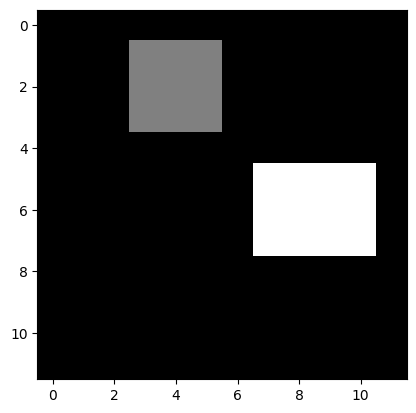

In [45]:
image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.uint8)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image)
plt.imshow(labels, cmap="gray")
print(num_labels)
print(labels)
print(stats)
print(centroids)

[[[6 3]]

 [[5 4]]

 [[4 4]]

 [[4 5]]

 [[3 6]]

 [[4 7]]

 [[4 8]]

 [[5 8]]

 [[6 9]]

 [[7 8]]

 [[8 8]]

 [[8 7]]

 [[9 6]]

 [[8 5]]

 [[8 4]]

 [[7 4]]]
19.313708305358887
20.0
0.6737651190752144


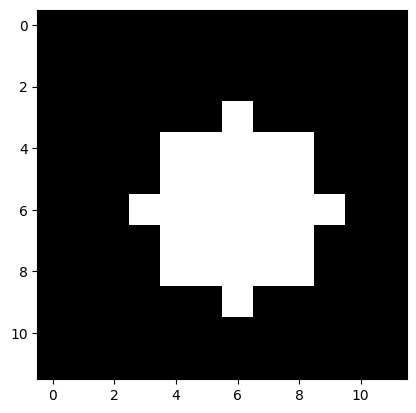

In [71]:
# 12x12の二値画像データ
image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.uint8)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image)
plt.imshow(labels, cmap="gray")

# データ型の変換
labels = labels.astype(np.uint8)

# 輪郭線
contours, _ = cv2.findContours(labels, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(contours[0])

# 周囲長
perimeter = cv2.arcLength(contours[0], True)
print(perimeter)

# 面積
area = cv2.contourArea(contours[0])
print(area)

# 円形度
c = (4 * np.pi * area) / (perimeter ** 2)
print(c)